In [1]:
# Import Exscientia sandpit as before
import BioSimSpace.Sandpit.Exscientia as BSS

# Imports for plotting and analysis
import matplotlib.pyplot as plt
import numpy as np

/home/yanfz/miniconda3/envs/a3fe/lib/python3.12/site-packages/nglview/__init__.py:12: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
INFO:rdkit:Enabling RDKit 2024.03.5 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


In [2]:
from scipy import stats
import BioSimSpace as BSS

In [4]:
pmfs=[]
overlaps = []
for i in range (1,6):

    pmf, overlap = BSS.FreeEnergy.AlchemicalFreeEnergy.analyse(
    f"/home/yanfz/IBG1_test5_adpt_copy/get_restrain/release{i}", estimator="MBAR"
    )

    pmfs.append(pmf)
    overlaps.append(overlaps)

2025-07-08 14:12:37.697 | DEBUG    | alchemlyb.preprocessing.subsampling:statistical_inefficiency:530 - Running statistical inefficiency analysis.


Could not calculate statistical inefficiency.
Running without calculating the statistical inefficiency and without subsampling...


INFO:2025-07-08 14:12:41,022:jax._src.xla_bridge:924: Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:2025-07-08 14:12:41,024:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:2025-07-08 14:12:41,029:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
2025-07-08 14:12:45.264 | DEBUG    | alchemlyb.preprocessing.subsampling:statistical_inefficiency:530 - Running statistical inefficiency analysis.


Could not calculate statistical inefficiency.
Running without calculating the statistical inefficiency and without subsampling...


2025-07-08 14:12:52.092 | DEBUG    | alchemlyb.preprocessing.subsampling:statistical_inefficiency:530 - Running statistical inefficiency analysis.


Could not calculate statistical inefficiency.
Running without calculating the statistical inefficiency and without subsampling...


2025-07-08 14:12:58.793 | DEBUG    | alchemlyb.preprocessing.subsampling:statistical_inefficiency:530 - Running statistical inefficiency analysis.


Could not calculate statistical inefficiency.
Running without calculating the statistical inefficiency and without subsampling...


2025-07-08 14:13:05.503 | DEBUG    | alchemlyb.preprocessing.subsampling:statistical_inefficiency:530 - Running statistical inefficiency analysis.


Could not calculate statistical inefficiency.
Running without calculating the statistical inefficiency and without subsampling...


In [10]:
energies = []
mean_energy = []
for i in range (5):
    energy = pmfs[i][-1][1].value()
    std = pmfs[i][-1][2].value()
    CI = std * 1.96
    mean_energy.append(energy)
    energies.append (f"{energy} +/- {CI} kcal/mol")

In [9]:
energies

['18.825388037351956 +/- 0.2045216642654907',
 '19.04164091213883 +/- 0.21049862112710088',
 '19.971381174135786 +/- 0.239617095620072',
 '19.37955901999096 +/- 0.2268112810366142',
 '20.19316223343801 +/- 0.22229849029489385']

In [12]:
np.array(mean_energy).mean()

np.float64(19.482226275411108)

In [14]:
np.array(mean_energy).std()*1.96

np.float64(1.029996299016164)

In [46]:
pmf_dict = {f"pmf_{i}" : [] for i in range(5)}
for i in range(5):
    for j in range(11):
        pmf_dict[f"pmf_{i}"].append(pmfs[i][j][1].value())

In [35]:
lam_list = [i/10 for i in range(0,11)]
lam_array = np.array(lam_list)

In [50]:
pmf_matrix =  np.array([pmf_dict[f"pmf_{i}"] for i in range(5)])

array([[ 0.        ,  0.57453512,  4.04560989,  7.98232341, 11.21158626,
        13.633003  , 15.40931161, 16.72580022, 17.66492887, 18.3424784 ,
        18.82538804],
       [ 0.        ,  0.67849832,  4.25799176,  8.24082084, 11.52196992,
        14.03184254, 15.84530764, 17.12609441, 17.98104161, 18.58739246,
        19.04164091],
       [ 0.        ,  0.70854968,  5.26879244,  9.28770344, 12.42743876,
        14.82372286, 16.579216  , 17.8924585 , 18.84110242, 19.49858675,
        19.97138117],
       [ 0.        ,  0.61701204,  4.68156961,  8.7405847 , 12.01321337,
        14.48421945, 16.20080219, 17.44980056, 18.31273851, 18.92293528,
        19.37955902],
       [ 0.        ,  0.61179728,  4.58205617,  8.82362093, 12.13082267,
        14.62082629, 16.60618479, 18.05194302, 19.01489482, 19.69109058,
        20.19316223]])

In [52]:
mean=np.mean(pmf_matrix,axis =0)
mean

array([ 0.        ,  0.63807849,  4.56720398,  8.61501066, 11.8610062 ,
       14.31872283, 16.12816445, 17.44921934, 18.36294124, 19.0084967 ,
       19.48222628])

In [53]:
def mean_and_95ci(data: np.ndarray):
    n = data.shape[0]
    mean = np.mean(data,axis=0)
    sd = np.std(data, ddof=1, axis=0)  
    se = sd / np.sqrt(n)       
    t_val = stats.t.ppf(1 - 0.025, df=n-1)
    ci = t_val * se
    return mean, ci



In [60]:
mean_pmf, ci95 = mean_and_95ci(pmf_matrix)
mean + ci95

array([ 0.        ,  0.70543864,  5.14734118,  9.25181419, 12.46723383,
       14.91620473, 16.75945766, 18.12575022, 19.06787144, 19.72564569,
       20.21174877])

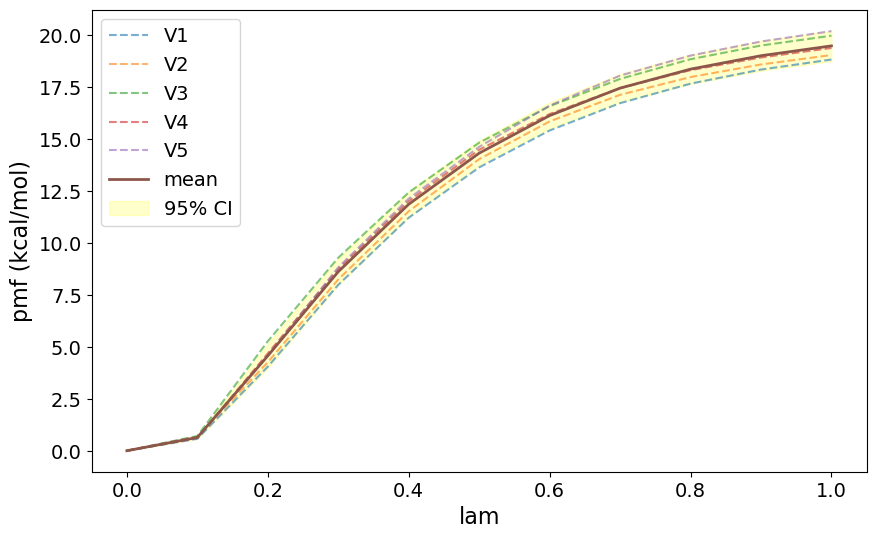

In [61]:
plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(lam_list, pmf_dict[f"pmf_{i}"], linestyle='--', alpha=0.6, label=f"V{i+1}")
plt.plot(lam_list,mean,linewidth=2, label="mean")
plt.fill_between(lam_list, mean - ci95, mean + ci95, color='yellow', alpha=0.2, label='95% CI')

plt.xlabel("lam")
plt.ylabel("pmf (kcal/mol)")
plt.legend()
plt.show()